# Time resampling

In [1]:
import pandas as pd
import numpy as np

In [2]:
covid =pd.read_csv('D:\shru\SEM 5\ML\\covid_19_world.csv',index_col='ObservationDate',parse_dates=True)

In [3]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68558 entries, 2020-01-22 to 2020-07-20
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SNo             68558 non-null  int64  
 1   Province/State  44125 non-null  object 
 2   Country/Region  68558 non-null  object 
 3   Last Update     68558 non-null  object 
 4   Confirmed       68558 non-null  float64
 5   Deaths          68558 non-null  float64
 6   Recovered       68558 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 4.2+ MB


In [4]:
covid.head()

,SNo,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
ObservationDate,,,,,,,
2020-01-22,1,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,2,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2020-01-22,3,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
2020-01-22,4,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
2020-01-22,5,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [5]:
datewise_covid=covid.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
datewise_covid.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,555.0,17.0,28.0
2020-01-23,653.0,18.0,30.0
2020-01-24,941.0,26.0,36.0
2020-01-25,1438.0,42.0,39.0
2020-01-26,2118.0,56.0,52.0


In [6]:
df2=datewise_covid.diff()
df2.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,NaN,NaN,NaN
2020-01-23,98.0,1.0,2.0
2020-01-24,288.0,8.0,6.0
2020-01-25,497.0,16.0,3.0
2020-01-26,680.0,14.0,13.0


In [7]:
India_data=covid[covid['Country/Region']=='India']
datewise_india=India_data.groupby(['ObservationDate']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum'})
datewise_india.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,1.0,0.0,0.0
2020-01-31,1.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,2.0,0.0,0.0
2020-02-03,3.0,0.0,0.0


# Resampling

In [8]:
df=datewise_india.diff()

In [9]:
df.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,1.0,0.0,0.0


In [10]:
df.tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-07-16,34975.0,688.0,22989.0
2020-07-17,35252.0,671.0,17994.0
2020-07-18,38697.0,543.0,23672.0
2020-07-19,40425.0,681.0,22664.0
2020-07-20,37132.0,585.0,24491.0


In [11]:
df.index

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08',
               ...
               '2020-07-11', '2020-07-12', '2020-07-13', '2020-07-14',
               '2020-07-15', '2020-07-16', '2020-07-17', '2020-07-18',
               '2020-07-19', '2020-07-20'],
              dtype='datetime64[ns]', name='ObservationDate', length=173, freq=None)

In [12]:
#Monthly Mean
df.resample(rule='M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,0.000000,0.000000,0.000000
2020-02-29,0.068966,0.000000,0.103448
2020-03-31,44.967742,1.129032,3.870968
2020-04-30,1115.533333,37.300000,298.166667
2020-05-31,5024.064516,137.225806,2670.451613
2020-06-30,13162.800000,399.733333,8537.566667
2020-07-31,28492.250000,534.100000,18829.950000


In [13]:
df2.resample(rule='M').mean()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,1041.111111,21.777778,21.555556
2020-02-29,2623.724138,94.068966,1364.137931
2020-03-31,24886.258065,1263.419355,4459.548387
2020-04-30,79978.633333,6376.033333,27890.833333
2020-05-31,93874.193548,4472.483871,52470.193548
2020-06-30,143629.733333,4640.600000,90398.100000
2020-07-31,211372.750000,4931.700000,146857.950000


# Custom resampling

In [14]:
def first_day(entry):
    if len(entry): #handles the case of missing data
        return entry[0]

In [15]:
df.resample(rule='M').apply(first_day)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,NaN,NaN,NaN
2020-02-29,0.0,0.0,0.0
2020-03-31,0.0,0.0,0.0
2020-04-30,601.0,23.0,25.0
2020-05-31,2394.0,69.0,939.0
2020-06-30,7761.0,200.0,3902.0
2020-07-31,19148.0,434.0,11881.0


In [16]:
df2.resample(rule='M').apply(first_day)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,NaN,NaN,NaN
2020-02-29,2113.0,46.0,62.0
2020-03-31,2358.0,55.0,2934.0
2020-04-30,75118.0,4702.0,15143.0
2020-05-31,86931.0,5262.0,38574.0
2020-06-30,98906.0,3508.0,54680.0
2020-07-31,216713.0,4957.0,224412.0


# Plotting

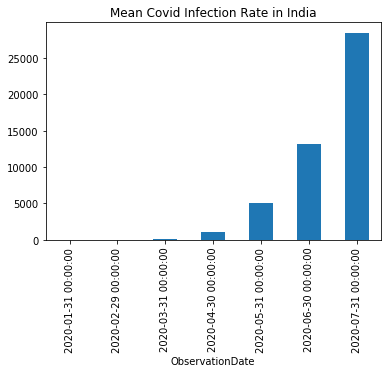

In [17]:
df['Confirmed'].resample('M').mean().plot.bar(title="Mean Covid Infection Rate in India");

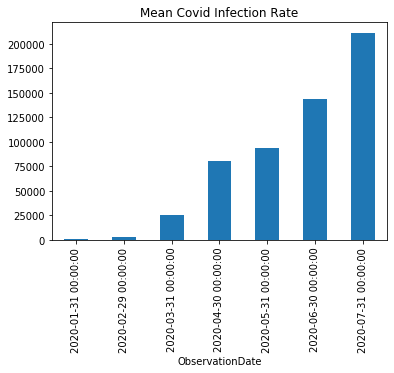

In [18]:
df2['Confirmed'].resample('M').mean().plot.bar(title="Mean Covid Infection Rate");

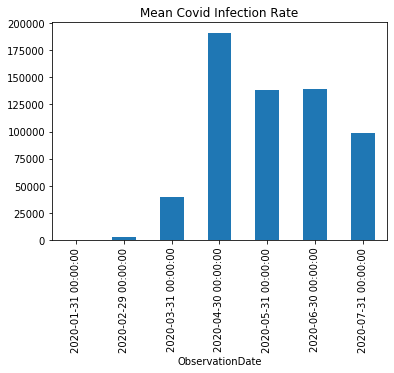

In [19]:
df2['Deaths'].resample('M').sum().plot.bar(title="Mean Covid Infection Rate");

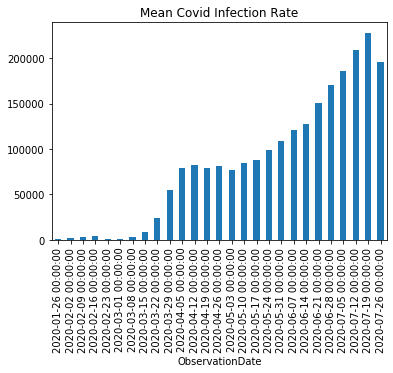

In [20]:
df2['Confirmed'].resample('W').mean().plot.bar(title="Mean Covid Infection Rate");

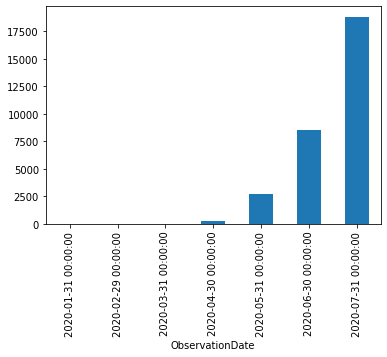

In [21]:
title='Mean Covid Recovery Rate in India'
df['Recovered'].resample('M').mean().plot.bar(title);

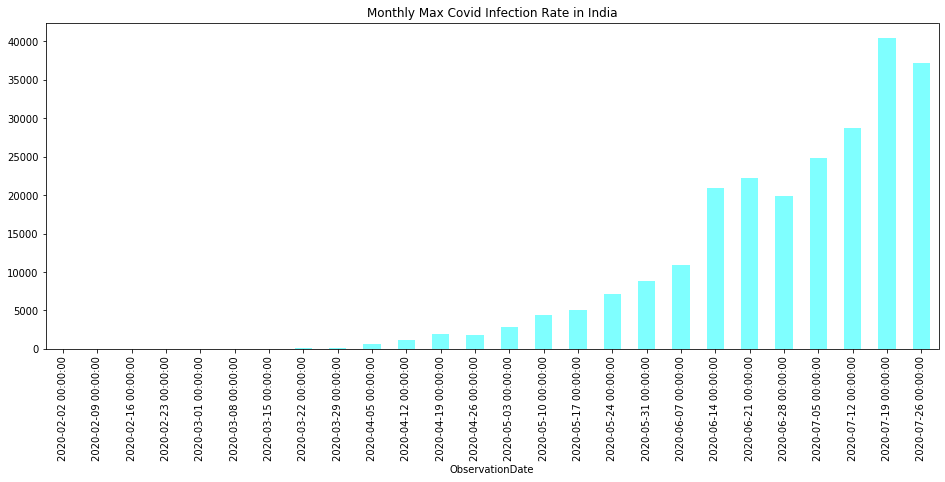

In [22]:
title='Monthly Max Covid Infection Rate in India'
df['Confirmed'].resample('W').max().plot.bar(figsize=(16,6),title=title,color=(0.00,1.00,1.00,0.5));

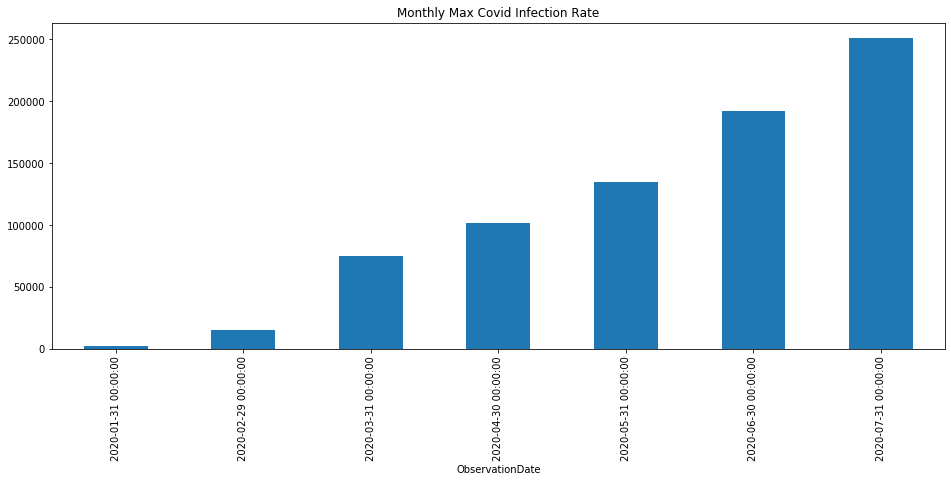

In [26]:
title='Monthly Max Covid Infection Rate'
df2['Confirmed'].resample('M').max().plot.bar(figsize=(16,6),title=title,color='#1f77b4');

# Time shifting

In [28]:
df.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,1.0,0.0,0.0


In [29]:
df.shift(1).head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0
2020-02-03,1.0,0.0,0.0


In [30]:
df.shift(3).head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN
2020-02-03,0.0,0.0,0.0


In [31]:
df.shift(1).tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-07-16,32676.0,605.0,20736.0
2020-07-17,34975.0,688.0,22989.0
2020-07-18,35252.0,671.0,17994.0
2020-07-19,38697.0,543.0,23672.0
2020-07-20,40425.0,681.0,22664.0


# shirt() backwards

In [32]:
df.head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,1.0,0.0,0.0


In [33]:
df.shift(-1).head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0
2020-02-01,1.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,0.0,0.0,0.0


In [34]:
df.shift(-1).tail()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-07-16,35252.0,671.0,17994.0
2020-07-17,38697.0,543.0,23672.0
2020-07-18,40425.0,681.0,22664.0
2020-07-19,37132.0,585.0,24491.0
2020-07-20,NaN,NaN,NaN


# Shifting based on time series frequency code

In [35]:
#shift everything forward one month
df.shift(periods=1,freq='M').head()

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-31,NaN,NaN,NaN
2020-02-29,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0
2020-02-29,1.0,0.0,0.0
2020-02-29,1.0,0.0,0.0


# Rolling and expanding
simple moving average

In [44]:
df.head(15)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,1.0,0.0,0.0
2020-02-03,1.0,0.0,0.0
2020-02-04,0.0,0.0,0.0
2020-02-05,0.0,0.0,0.0
2020-02-06,0.0,0.0,0.0
2020-02-07,0.0,0.0,0.0


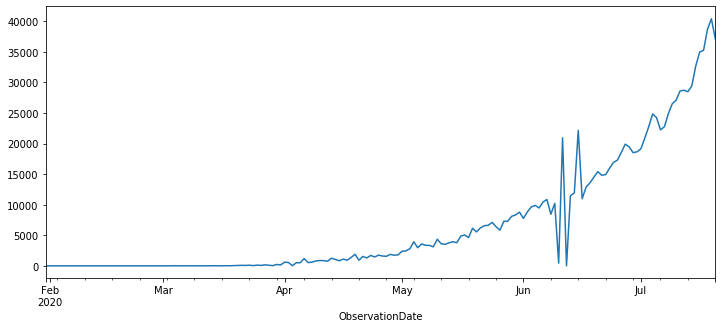

In [41]:
df['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

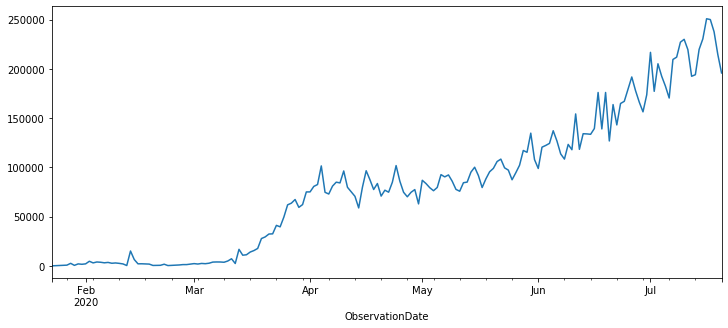

In [42]:
df2['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Adding rolling mean. This rolling method provides row entries, where every entry is then representative of the window.

In [43]:
#7 day rolling mean
df.rolling(window=7).mean().head(15)

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-30,NaN,NaN,NaN
2020-01-31,NaN,NaN,NaN
2020-02-01,NaN,NaN,NaN
2020-02-02,NaN,NaN,NaN
2020-02-03,NaN,NaN,NaN
2020-02-04,NaN,NaN,NaN
2020-02-05,NaN,NaN,NaN
2020-02-06,0.285714,0.0,0.0
2020-02-07,0.285714,0.0,0.0


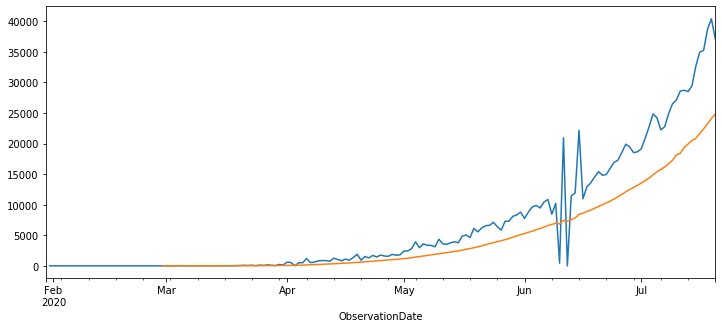

In [46]:
df['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Confirmed'].plot();

The easiest way to add a legend to make the rolling value a new column, then pandas does it automatically.

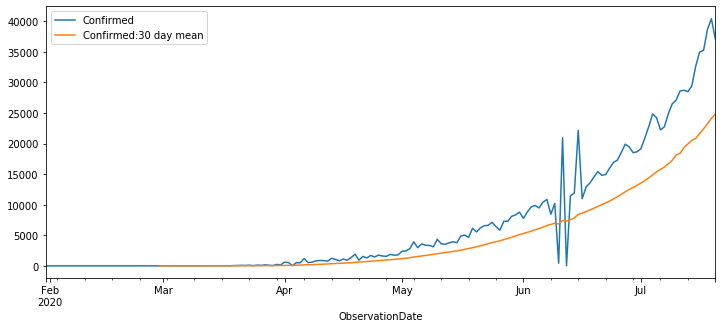

In [49]:
df['Confirmed:30 day mean']=df['Confirmed'].rolling(window=30).mean()
df[['Confirmed','Confirmed:30 day mean']].plot(figsize=(12,5)).autoscale(axis="x",tight=True);

# Expanding
Instead of calculating values for a rolling window of dates, what if we wanted to take into a count everything from the start of the time series up to each point of time? For example,instead of considering the average, It considers all prior data in expanding set of averages.

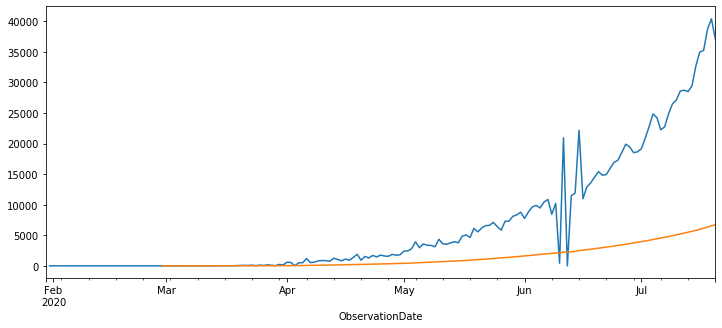

In [50]:
df['Confirmed'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

#sepcify a min no. of periods to start from
df['Confirmed'].expanding(min_periods=30).mean().plot(figsize=(12,5))